In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/malaria-in-africa/DatasetAfricaMalaria.csv


**GEOSPATIAL ANALYSIS OF MALARIA CASES IN AFRICA 
By MERENE ATTERH**

* The data on malaria cases in Africa from 2007 to 2017 is extracted below.
* The data is examined to group it into different categories  

In [2]:
data=pd.read_csv("../input/malaria-in-africa/DatasetAfricaMalaria.csv")
data.info()
                 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 594 entries, 0 to 593
Data columns (total 27 columns):
 #   Column                                                                                   Non-Null Count  Dtype  
---  ------                                                                                   --------------  -----  
 0   Country Name                                                                             594 non-null    object 
 1   Year                                                                                     594 non-null    int64  
 2   Country Code                                                                             594 non-null    object 
 3   Incidence of malaria (per 1,000 population at risk)                                      550 non-null    float64
 4   Malaria cases reported                                                                   550 non-null    float64
 5   Use of insecticide-treated bed nets (% of under-5 population)   

* The statistics on different malaria preventitive measures in different countries including Ghana, are extracted

In [3]:
data.describe()

,Year,"Incidence of malaria (per 1,000 population at risk)",Malaria cases reported,Use of insecticide-treated bed nets (% of under-5 population),Children with fever receiving antimalarial drugs (% of children under age 5 with fever),Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women),People using safely managed drinking water services (% of population),"People using safely managed drinking water services, rural (% of rural population)","People using safely managed drinking water services, urban (% of urban population)",People using safely managed sanitation services (% of population),...,Urban population (% of total population),Urban population growth (annual %),People using at least basic drinking water services (% of population),"People using at least basic drinking water services, rural (% of rural population)","People using at least basic drinking water services, urban (% of urban population)",People using at least basic sanitation services (% of population),"People using at least basic sanitation services, rural (% of rural population)","People using at least basic sanitation services, urban (% of urban population)",latitude,longitude
count,594.000000,550.000000,5.500000e+02,132.000000,122.000000,106.000000,99.000000,88.000000,176.000000,132.000000,...,588.000000,588.000000,588.000000,566.000000,566.000000,588.000000,566.000000,566.000000,594.000000,594.000000
mean,2012.000000,190.087491,1.068330e+06,42.530303,30.201639,15.013958,33.478990,12.470568,51.549545,28.768939,...,43.164116,3.523061,65.994915,51.449576,84.268498,39.469796,28.077208,48.088375,2.828796,17.342546
std,3.164943,163.054527,2.192802e+06,20.157059,18.903198,12.389166,26.678321,10.078371,24.157416,18.631510,...,18.086118,1.456244,17.283361,18.927868,9.307285,26.304934,24.046725,21.802128,15.678226,20.041257
min,2007.000000,0.000000,0.000000e+00,1.000000,0.500000,0.000000,5.770000,0.930000,11.200000,6.370000,...,9.860000,-4.650000,28.960000,17.050000,52.010000,4.990000,1.890000,12.580000,-30.559482,-24.013197
25%,2009.000000,30.857500,2.211750e+03,26.675000,17.275000,5.763285,8.975000,4.185000,34.125000,16.532500,...,28.795000,2.512500,52.375000,37.075000,78.080000,18.197500,8.842500,30.775000,-6.369028,0.824782
50%,2012.000000,174.775000,1.130260e+05,42.900000,29.300000,11.500000,28.390000,10.675000,51.365000,25.410000,...,41.560000,3.730000,64.470000,50.435000,85.420000,32.555000,18.815000,44.695000,6.744051,18.611308
75%,2015.000000,347.637500,1.154808e+06,56.325000,42.625000,21.850000,43.890000,16.887500,70.747500,35.725000,...,56.945000,4.450000,79.165000,62.245000,90.082500,54.810000,38.082500,58.845000,12.862807,31.465866
max,2017.000000,585.540000,1.682113e+07,95.500000,76.900000,59.600000,92.660000,39.930000,89.540000,78.120000,...,88.980000,7.400000,99.870000,99.830000,99.920000,100.000000,95.180000,98.300000,33.886917,57.552152


* Extraneous data is removed

In [4]:
data_cleaning= [ col for col in data.columns if data[col].isnull().sum() > 60]
data_cleaning

['Use of insecticide-treated bed nets (% of under-5 population)',
 'Children with fever receiving antimalarial drugs (% of children under age 5 with fever)',
 'Intermittent preventive treatment (IPT) of malaria in pregnancy (% of pregnant women)',
 'People using safely managed drinking water services (% of population)',
 'People using safely managed drinking water services, rural (% of rural population)',
 'People using safely managed drinking water services, urban (% of urban population)',
 'People using safely managed sanitation services (% of population)',
 'People using safely managed sanitation services, rural (% of rural population)',
 'People using safely managed sanitation services, urban  (% of urban population)']

* A smaller number of countries with similar population densities are compared. 
* The statistics of the number of cases reported over time are generated

In [5]:
data=data.drop(columns= data_cleaning)
cases_per_country= data[['Country Name','Malaria cases reported']].groupby('Country Name').sum().sort_values(by='Malaria cases reported')
cases_per_country=cases_per_country.tail(10)
cases_per_country['Country Name'] =['Malawi','Angola','Tanzania','Ghana','Nigeria','Burundi','Uganda','Burkina Faso','Mozambique','Congo,Dem. Rep.']
cases_per_country


,Malaria cases reported,Country Name
Country Name,,
Malawi,19445640.0,Malawi
Angola,24034182.0,Angola
Tanzania,24283088.0,Tanzania
Ghana,28008309.0,Ghana
Nigeria,40066570.0,Nigeria
Burundi,40249714.0,Burundi
Uganda,41126230.0,Uganda
Burkina Faso,41601963.0,Burkina Faso
Mozambique,43984158.0,Mozambique


* The bar plot below illustrates the number of cases reported over time
* The number of malaria cases reported in the Ghanaian population was greater than in Malawi, Angola, and Tanzania
* However, it was still considerably less than the remaining countries.

<AxesSubplot:xlabel='Malaria cases reported', ylabel='Country Name'>

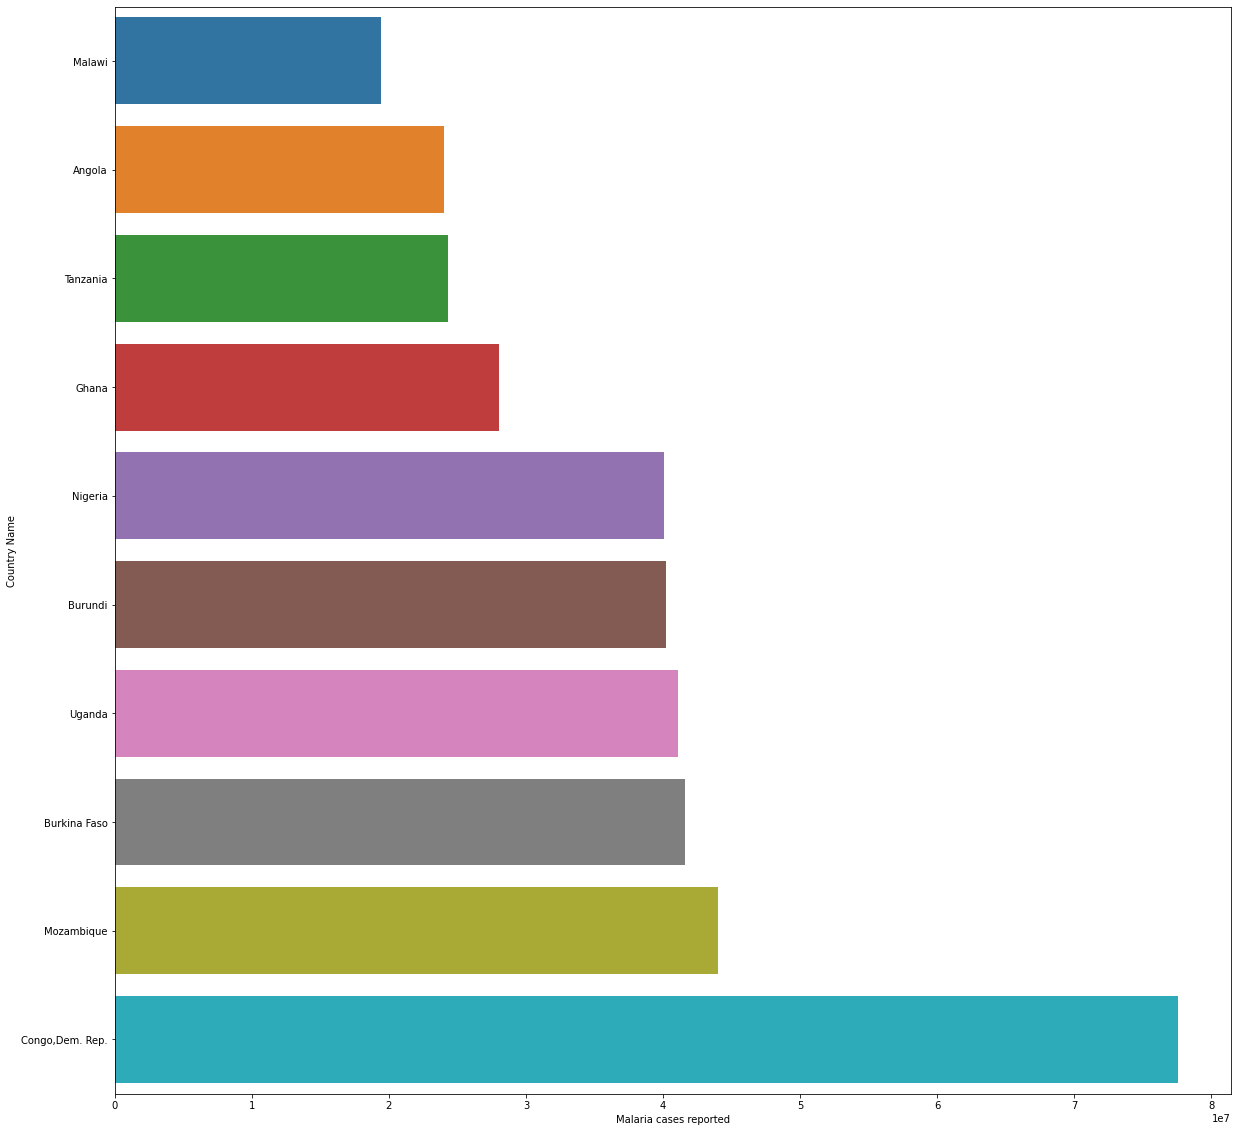

In [6]:

plt.figure(figsize=(20,20))
sns.barplot(x="Malaria cases reported",y="Country Name",data=cases_per_country)

# 

**Yearly increase in malaria cases from 2008 to 2016**

<AxesSubplot:xlabel='Year', ylabel='Malaria cases reported'>

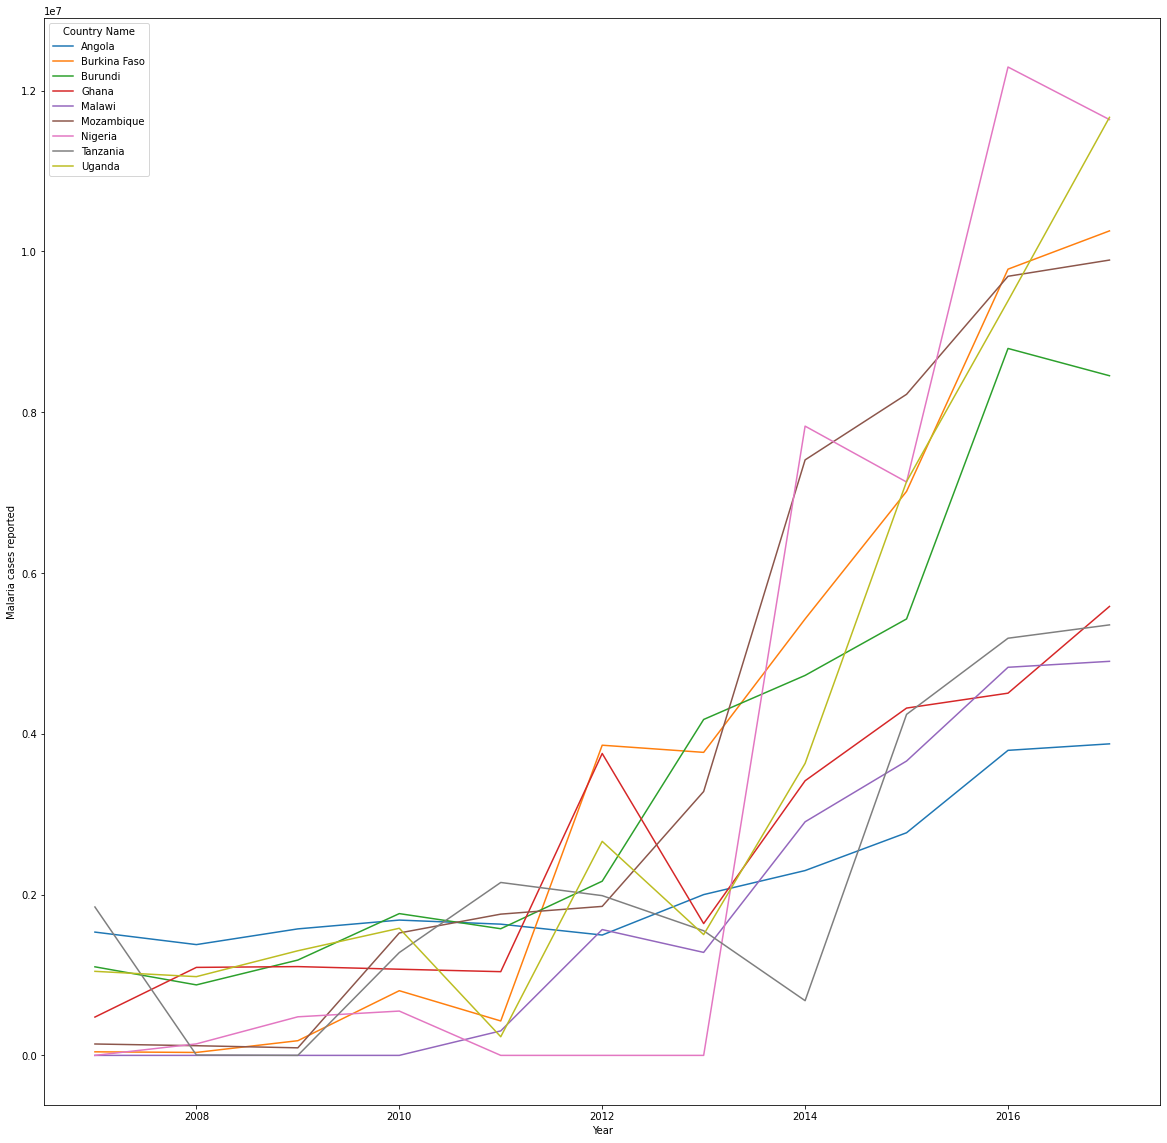

In [7]:
plt.figure(figsize=(20,20))
yearly_increase=data[data['Country Name'].isin(['Malawi','Angola','Tanzania','Ghana','Nigeria','Burundi','Uganda','Burkina Faso','Mozambique','Congo.Dem. Rep'])]
sns.lineplot(data=yearly_increase,x="Year",y="Malaria cases reported",hue="Country Name")

<AxesSubplot:>

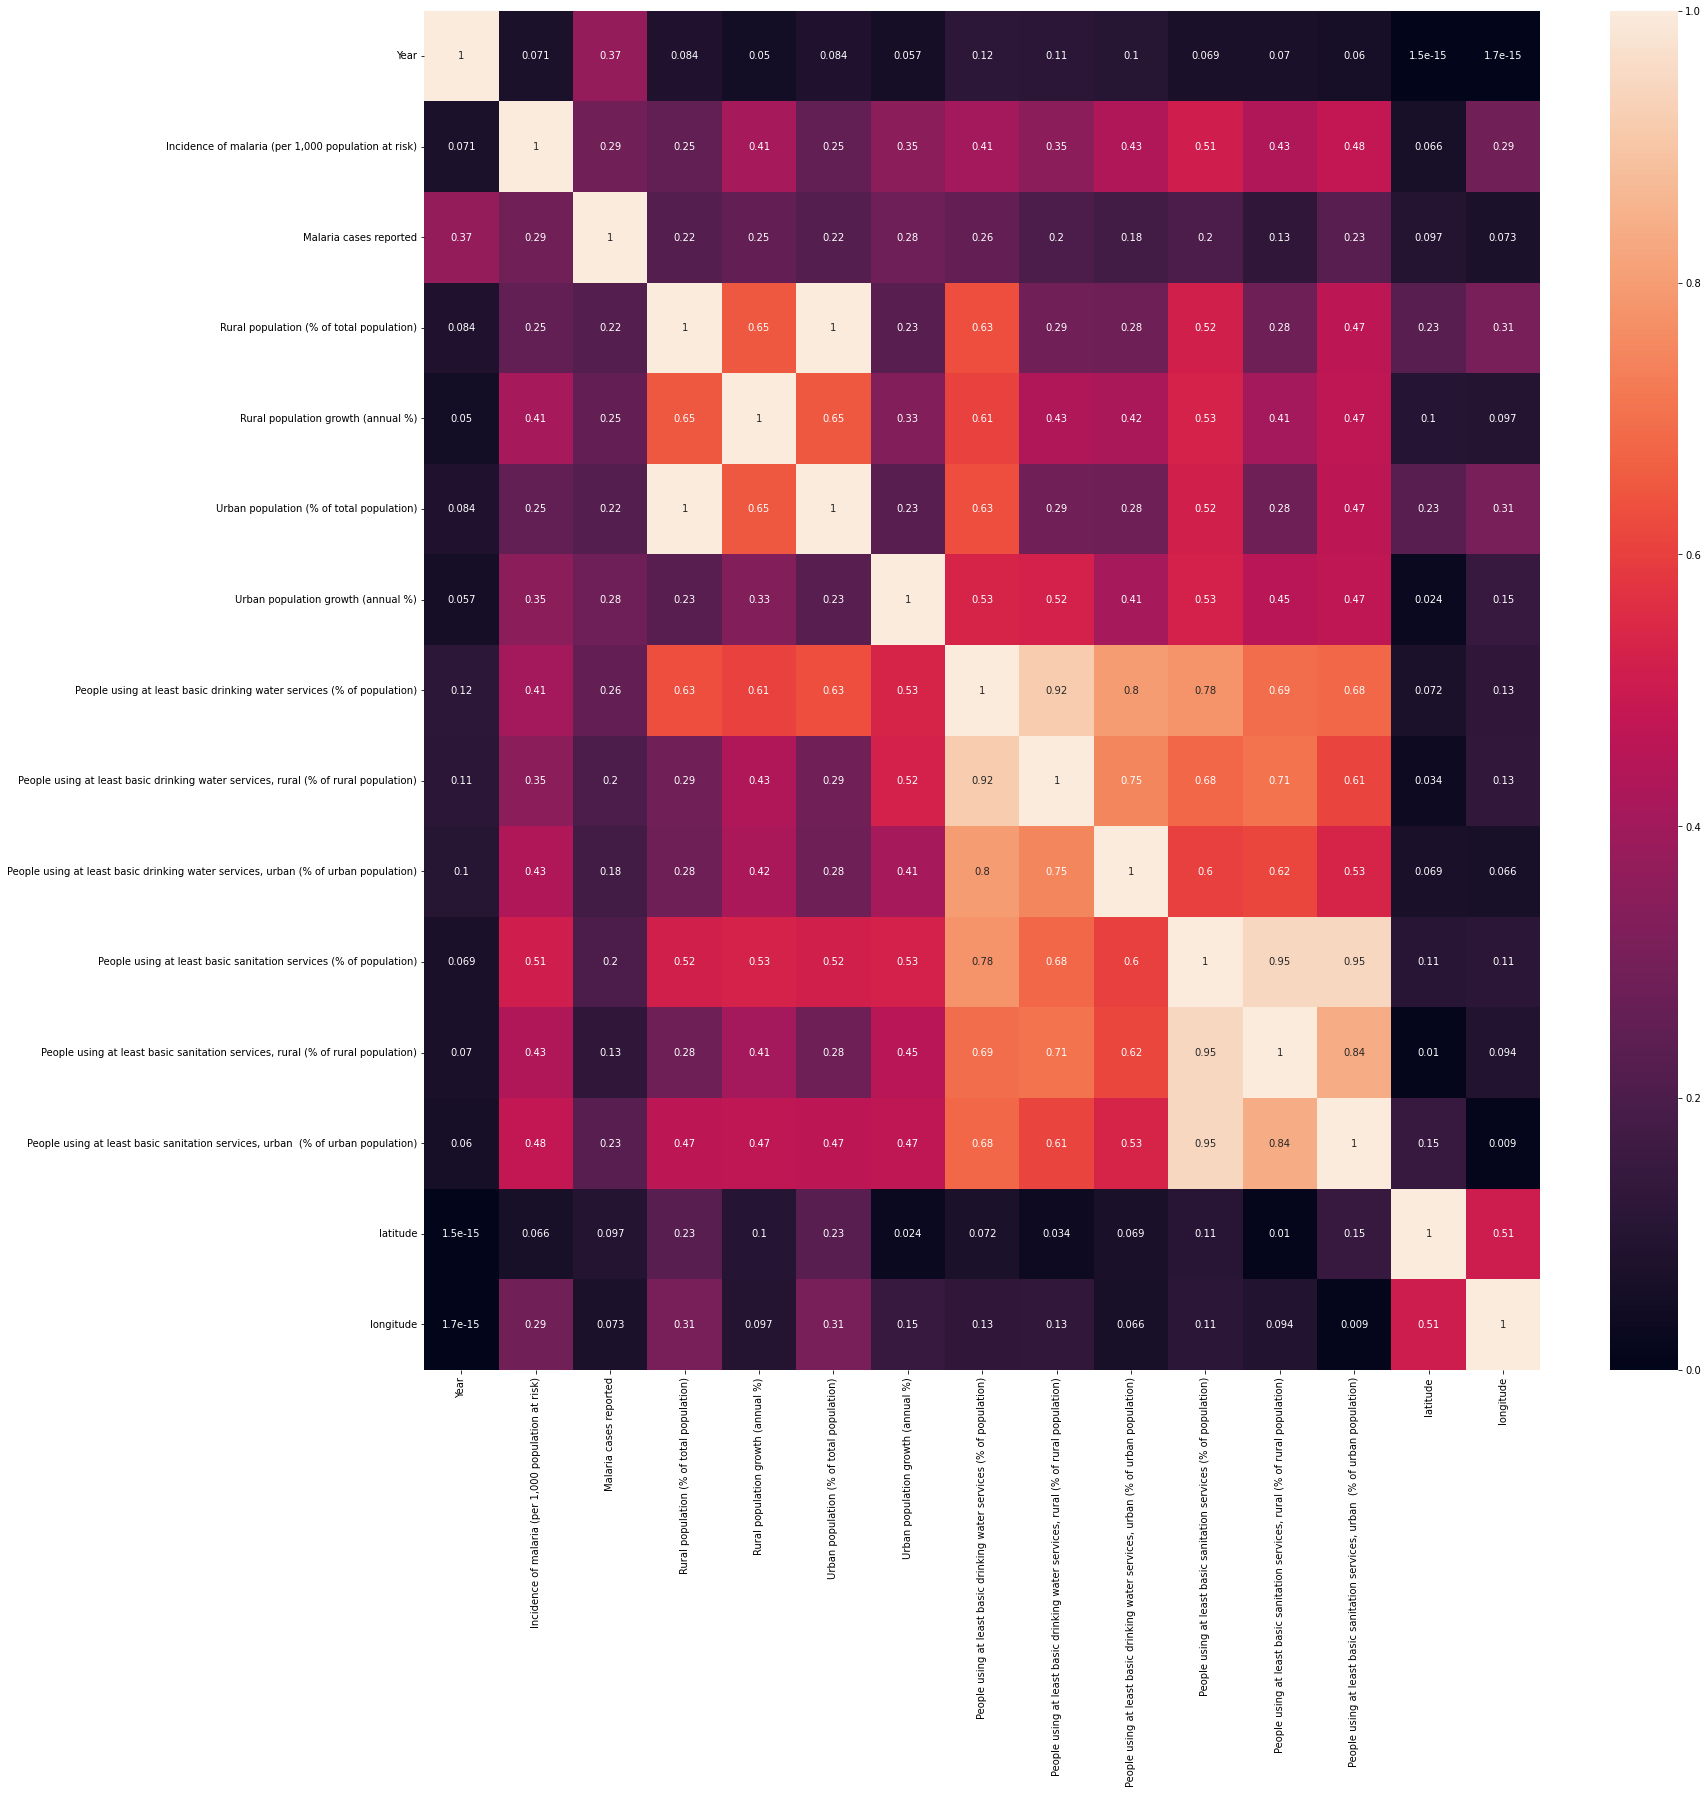

In [8]:
plt.figure(figsize=(25,25))
sns.heatmap(data.corr().abs(),annot=True)

In [9]:
import folium
from folium import Choropleth,Circle,Marker
from folium.plugins import HeatMap, MarkerCluster

#Creating map
m_1=folium.Map(location=[9.000,18.000], tiles='cartodbpositron',zoom_start=3)



for idx, row in data.iterrows():
    Marker([row['latitude'],row['longitude']]).add_to(m_1)
m_1

In [10]:
#importing plotly packages
import plotly.offline as py
from plotly import tools
import plotly.graph_objs as go
import plotly.express as px


In [11]:
from datetime import datetime
df=data
df['Year'] = pd.to_datetime(df.Year,format='%Y')


In [12]:
plt.figure(figsize=(10,10))
Malaria_data = df[['Country Name','Year','Country Code','Incidence of malaria (per 1,000 population at risk)','Malaria cases reported','latitude','longitude','geometry']]
Malaria_data.Year = Malaria_data.Year.astype(str)
fig1 = px.choropleth(Malaria_data,locations=Malaria_data['Country Code'],color=Malaria_data['Incidence of malaria (per 1,000 population at risk)'],color_continuous_scale='Blues',locationmode='ISO-3',scope='africa',animation_frame=Malaria_data['Year'],title="Incidence of Malaria at risk in Africa",labels={'color':'Incidence of Malaria'})

fig1.show()

/opt/conda/lib/python3.7/site-packages/pandas/core/generic.py:5516: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 720x720 with 0 Axes>

In [13]:
fig2 = px.choropleth(Malaria_data,locations=Malaria_data['Country Code'],color=Malaria_data['Malaria cases reported'],color_continuous_scale='Blues',locationmode='ISO-3',scope='africa',animation_frame=Malaria_data['Year'],title="Malaria Cases in Africa",labels={'color':'number of Malaria cases'})

fig2.show()